In [9]:
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import seaborn as sns

In [12]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

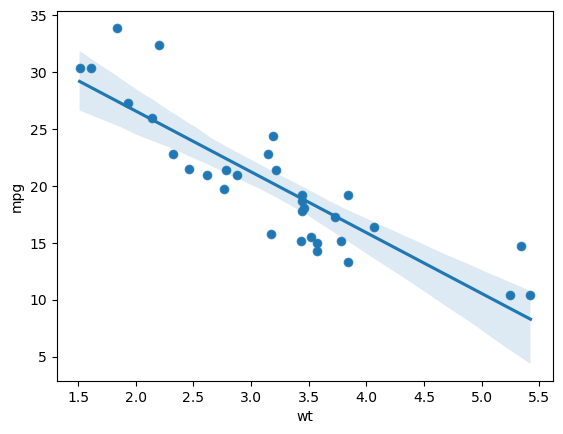

In [13]:
sns.scatterplot(x= 'wt', y= 'mpg', data=cars)
sns.regplot(x='wt', y= 'mpg', data=cars)

In [14]:
X_list = cars.wt.values
x_np = np.array(X_list, dtype = np.float32).reshape(-1, 1)

In [15]:
x_np.shape

(32, 1)

In [26]:
y_list =cars.mpg.values.tolist() 
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(x_np)
y = torch.tensor(y_list)
y_true = torch.from_numpy(y_np)

In [17]:
## training 
w = torch.rand(1, requires_grad = True, dtype = torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)
num_epochs = 1000
lr = 0.001

for epoch in range(num_epochs):
    for i in range(len(X)):
        #forward pass
        y_pred = X[i] * w + b

        #calc loss
        loss_tensor = torch.pow(y_pred - y[i], 2)

        #backward pass
        loss_tensor.backward()

        # store loss
        loss_values = loss_tensor.data[0]

        #update weights
        with torch.no_grad():
            w -= w.grad * lr
            b -= b.grad * lr
            w.grad.zero_()
            b.grad.zero_()
    print(loss_values)



tensor(137.2680)
tensor(74.5286)
tensor(52.1312)
tensor(43.0689)
tensor(39.0220)
tensor(37.0318)
tensor(35.9272)
tensor(35.2149)
tensor(34.6795)
tensor(34.2255)
tensor(33.8103)
tensor(33.4148)
tensor(33.0303)
tensor(32.6530)
tensor(32.2810)
tensor(31.9136)
tensor(31.5503)
tensor(31.1910)
tensor(30.8355)
tensor(30.4838)
tensor(30.1360)
tensor(29.7917)
tensor(29.4511)
tensor(29.1142)
tensor(28.7808)
tensor(28.4509)
tensor(28.1246)
tensor(27.8017)
tensor(27.4822)
tensor(27.1662)
tensor(26.8534)
tensor(26.5441)
tensor(26.2380)
tensor(25.9352)
tensor(25.6356)
tensor(25.3391)
tensor(25.0459)
tensor(24.7558)
tensor(24.4688)
tensor(24.1848)
tensor(23.9039)
tensor(23.6260)
tensor(23.3511)
tensor(23.0791)
tensor(22.8100)
tensor(22.5438)
tensor(22.2805)
tensor(22.0199)
tensor(21.7622)
tensor(21.5073)
tensor(21.2550)
tensor(21.0055)
tensor(20.7587)
tensor(20.5145)
tensor(20.2730)
tensor(20.0340)
tensor(19.7977)
tensor(19.5639)
tensor(19.3326)
tensor(19.1038)
tensor(18.8775)
tensor(18.6536)
tensor(

In [18]:
print(f"the Weights are {w.item()}, Bias: {b.item()}")

the Weights are -5.229808807373047, Bias: 36.806793212890625


In [19]:
y_pred = ((X * w) + b).detach().numpy()

In [20]:
y_pred

array([[23.104694],
       [21.771093],
       [24.673637],
       [19.992958],
       [18.81625 ],
       [18.711655],
       [18.136375],
       [20.123703],
       [20.332895],
       [18.81625 ],
       [18.81625 ],
       [15.521471],
       [17.299606],
       [17.038116],
       [ 9.350296],
       [ 8.440311],
       [ 8.853466],
       [25.301212],
       [28.360653],
       [27.210094],
       [23.915314],
       [18.397867],
       [18.8424  ],
       [16.724327],
       [16.698177],
       [26.687115],
       [25.615002],
       [28.894093],
       [20.228298],
       [22.320223],
       [18.136375],
       [22.267925]], dtype=float32)

In [21]:
#i need it  to be 1 dim instead of 2dim
y_pred.shape

(32, 1)

<Axes: >

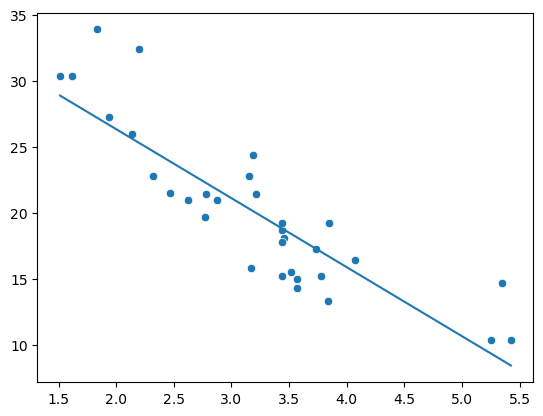

In [22]:
#visualizations 
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred.reshape(-1))

In [23]:
from sklearn.linear_model import LinearRegression
reg  = LinearRegression().fit(x_np, y_list)
print(f"slope: {reg.coef_}, intercept: {reg.intercept_}")

slope: [-5.3444715], intercept: 37.285125732421875


# Using classes

In [11]:
class LinearREG(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearREG, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out
input_dim = 1
output_dim = 1
model = LinearREG(input_size=input_dim,
                   output_size=output_dim)

In [28]:
# loss function
loss_func = nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
# training 
losses, slope, bias = [], [], []

for epoch in range(num_epochs):
    #setting gradient to zero 
    optimizer.zero_grad()

    #forward pass
    y_pred = model(X)

    #compute loss
    loss = loss_func(y_pred, y_true)

    # backward pass
    loss.backward()
    
    #update weights
    optimizer.step()

    #get parameters
    for name, param in model.named_parameters():
        if name == 'linear.weight':
            slope.append(param.data. numpy()[0][0])
        if name == 'linear.bias':
            bias.append(param.data.numpy()[0])
    
    # store loss
    losses.append(float(loss.data))

    #print loss
    if epoch % 100 == 0:
        print("Epoch: {}, Loss: {} ".format(epoch, loss.data))


Epoch: 0, Loss: 84.70597839355469 
Epoch: 100, Loss: 50.038536071777344 
Epoch: 200, Loss: 31.182903289794922 
Epoch: 300, Loss: 20.92734146118164 
Epoch: 400, Loss: 15.349335670471191 
Epoch: 500, Loss: 12.315462112426758 
Epoch: 600, Loss: 10.665339469909668 
Epoch: 700, Loss: 9.767841339111328 
Epoch: 800, Loss: 9.279678344726562 
Epoch: 900, Loss: 9.014168739318848 


<Axes: >

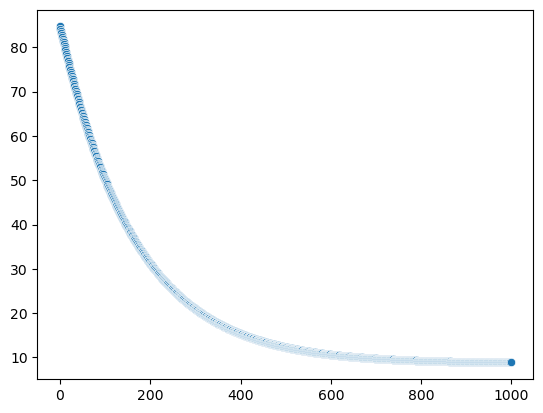

In [30]:
# visualization
sns.scatterplot(x=range(num_epochs), y=losses)

<Axes: >

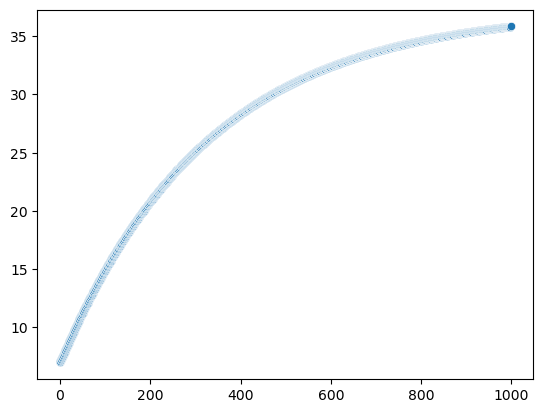

In [31]:
# visualization
sns.scatterplot(x=range(num_epochs), y=bias)

<Axes: >

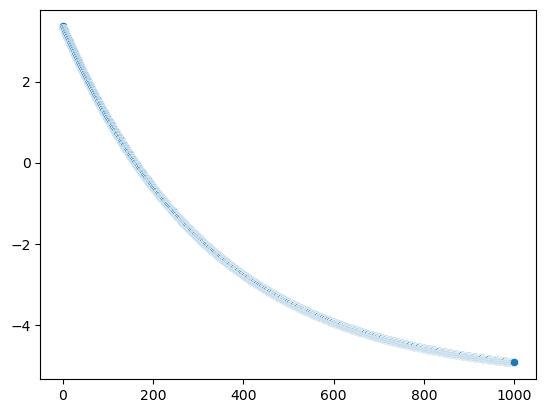

In [32]:
#visualize the slope
# visualization
sns.scatterplot(x=range(num_epochs), y=slope)

<Axes: >

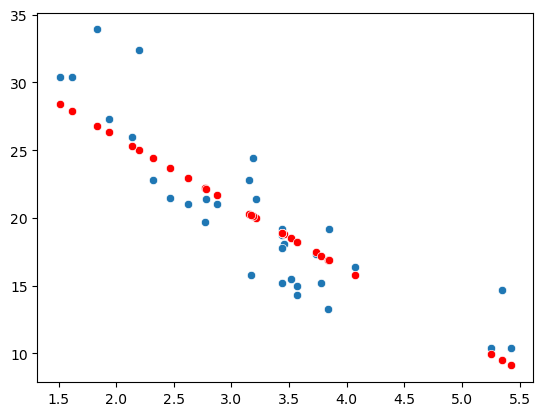

In [34]:
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_list, y=y_list)
sns.scatterplot(x=X_list, y=y_pred,color='red')
